In [58]:
#set up here
import time
import praw 
import pandas as pd
from datetime import datetime as dt
import pprint 
import json

#takeUser details
#CLIENT_ID = input(" past yourreddit client_id here ")
#CLIENT_SECRET = input(" past yourreddit client_id here client_secret ")
#YOUR_NAME = input(" past yourreddit client_id here user_name ")
#USER_AGENT = f"python:{CLIENT_ID}:0.1 (by /u/{YOUR_NAME})"
#----------------------
CLIENT_ID = "D8szAQzSukEngw"
CLIENT_SECRET = "CRODJrVcHZB9zOvbpO1UuJigoLA"
USER_AGENT = f"python:{CLIENT_ID}:0.1 (by /u/shmuelampfo)"

#access the readit api
api = praw.Reddit(
    client_id = CLIENT_ID,
    client_secret = CLIENT_SECRET,
    user_agent = USER_AGENT
)

# To test the api, see if this returns 'True'
api.read_only
#readit application
trump_result = []
trump_reddit = api.subreddit('africa').new(limit = 450)
for sub in trump_reddit:
    trump_result.append({
        "reddit_id" : sub.id,
            "name" : sub.author.name,
        "title" : sub.title,
        "score" : sub.score,
        "comments" : sub.num_comments,
        "date" : time.ctime(int(sub.created))
    })
#dir(sub)
# test prpint of data to see all possible variable 
#Import the pandas and praw libraries
#Create a new praw API instance with your client id, client secret and user agent.
#Get the 500 most recent submissions from a subreddit of your choice. A 'submission' is a Reddit post that can contain a link, text or image and has comments attached to it.
#Transform the submissions in a new list with a dictionary per submission. Every dictionary should contain these bits of information about the submission:
#The name of the author (e.g. 'aron_124409')
#Score (e.g. '20')
#Number of comments (e.g. '100')
#Title (e.g. 'Programmers needed!!!')
#Time of creation (e.g. 'Tue Oct 23 15:29:18 2018')
#Note that the Reddit API gives back timestamps, not dates, so you need to do a little conversion (i would suggest the ctime method).
#Be properly commented in the code in your notebook.
#Be executable using the Jupyter Notebook webapp.

In [59]:
#Create a new Pandas dataframe from this list and show the first five items.
df = pd.DataFrame(trump_result)
df.head()

,comments,date,name,reddit_id,score,title
0,0,Wed Oct 31 17:55:12 2018,childish5iasco,9swzje,1,Calling all Yoruba aficionados.
1,1,Wed Oct 31 15:05:57 2018,meridian-maps,9sw5as,5,I made a Floating Wood Map of Africa
2,0,Wed Oct 31 11:40:26 2018,lopo2311,9sutxm,1,Opinion | Why Buhari has become so unpopular
3,0,Wed Oct 31 11:36:01 2018,Blackstarx-music,9suspv,1,Blackstarx - Black Barbie Doll [Official Video]
4,7,Wed Oct 31 02:58:23 2018,liotier,9sqchx,19,Why don't many sub-Saharan African cities have...


In [62]:
#Show the names of the 10 authors in the dataframe that made the most submissions, and how many submissions they made.
ten_authors =  df["name"].value_counts().head(10)
ten_authors
# 6 peopel made two comments at the same time  whict fall in th top ten so I prented all of them

liotier              57
thundereagle19       29
fatumasvoice         20
boppinmule           16
lopo2311             16
NubianOracle11       12
lengau               11
Uzoclinton           10
AutoModerator         8
BlindFoxOnYouTube     8
Name: name, dtype: int64

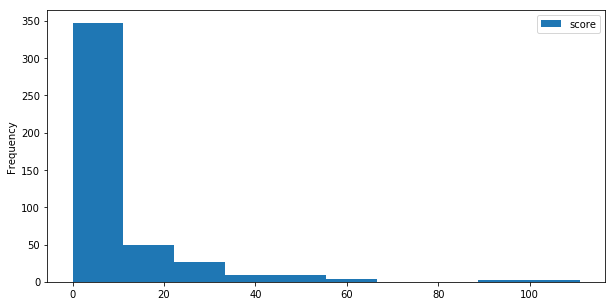

In [63]:
#Plot two histograms with ten bins: one for the comment counts and  one for the scores of all submissions.
#Both plots should have a title indicating their contents.
df.plot(kind='hist', figsize=(10,5), y = 'score', bins=10)

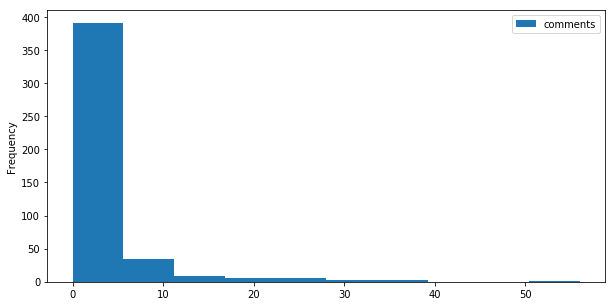

In [64]:
#Plot two histograms with ten bins: one for the comment counts and  one for the scores of all submissions.
#Both plots should have a title indicating their contents.
df.plot(kind='hist', figsize=(10,5), y = 'comments', bins=10)

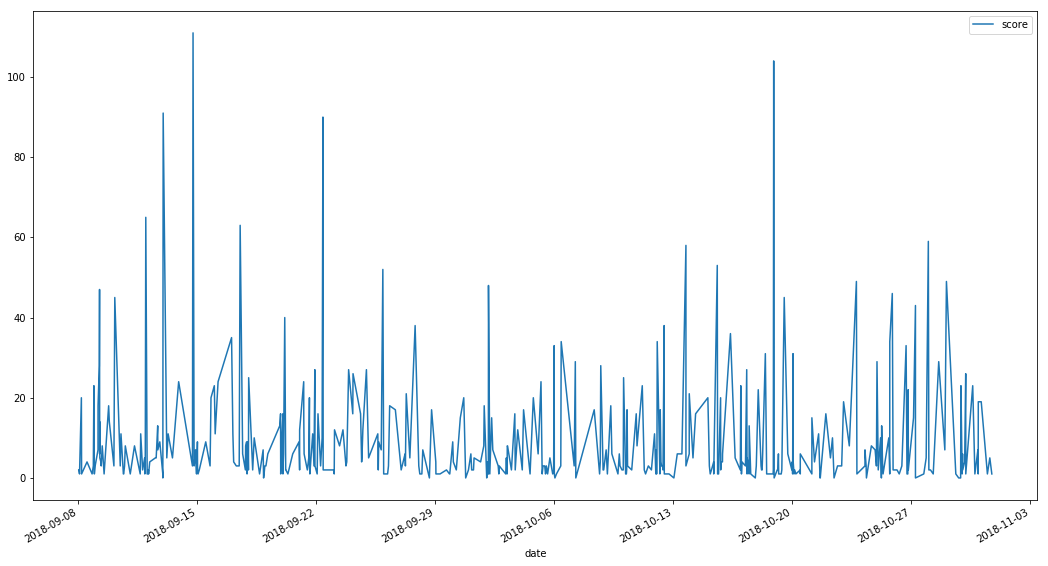

In [65]:
#note  done # this will be used for you integral assignmenet 
#Make a line plot showing the number of posts per hour/day/month,
#depending on the frequency of posting in your chosen subreddit. 
#You'll need to convert the time of creation to a new Pandas series and resample that to hour/day/month.
date_score = df.groupby("date").sum()
date_score.index = pd.to_datetime(date_score.index.astype(str))
date_score.index = pd.to_datetime(date_score.index)
date_score.plot(figsize = [18,10], y="score") 

In [66]:
#In your Dataframe, find the single submission with the most comments. Optionally, show the title, number of comments and score for this submission.
#Hint: either use the original data you got from the praw library, or do a new request for a single submission by ID. 
#index = df.index(highest_commented)
#df.index[highest_commented]
#if df["comments"] == highest_commented:
#finding the index of the highest commenete
#highest_commented
highest_commented = max(df["comments"])
for sub in trump_result:
    if sub['comments'] == highest_commented:
        highest_index = trump_result.index(sub)
df.iloc[highest_index,:]

comments                               56
date             Sat Oct 13 18:00:40 2018
name                              liotier
reddit_id                          9ns6cu
score                                  58
title        Business languages in Africa
Name: 151, dtype: object

In [ ]:
#For the same submission, show the top five comments and their score, name of the commenter and the first 100 characters of the comment text.
#Note that you need to take into account the 'MoreComments' instances (look in the examples notebook) and that some comments might not have an author. 
#putting al reddit comments in a new list by their specific id's
reddit_comments = []
trump_reddit = api.subreddit('africa').new(limit = 400)
for sub in trump_reddit:
    for comment in sub.comments.list():
           reddit_comments.append({
               "reddit_id" : sub.id,
               "reddit_id" : sub.id,
        "comment_text": comment.body[0:100],
        "comment_score": comment.score,
        "commnet_author": comment.author
           })      

#pprint.pprint(reddit_comments)
highest_commented = max(df["comments"])
for sub in trump_reddit:
    if sub['comments'] == highest_commented:
        highest_index = trump_result.index(sub)
post_id = df.iloc[highest_index,:]["reddit_id"]

#new list of the highly commneted list
higheted_commented_list = []
for coment in reddit_comments:
    if coment["reddit_id"] == post_id:
        higheted_commented_list.append(coment)

#higheted_commented_list
comments_df = pd.DataFrame(higheted_commented_list)
top_reddit_comments = comments_df.sort_values(by='comment_score', ascending=False)
top_reddit_comments.head(5)

In [ ]:
#A single user might have multiple comments in this submission. Calculate the summed score for every commenter in the submission. 
#Then, show the top five commenters and their summed score 

# done  here i tried a couple of options
#five_commentors =  df["name"].value_counts().head(10)
#ten_authors =  df["name"].value_counts()
#ten_authors =  df.sort_values(by='score', ascending=False)
#five_commentors = df.groupby(["name","comments","score"]).size().reset_index(name="totalscore")
#df1 = df.melt(["name", "score"])
#ten_authors = df.apply(pd.value_counts)
#ten_authors_comments =  ten_authors['name','comments'].value_counts()
#five_commentors[0:10]
#df1[0:10]
#df.sort_values("score", ascending=False).head(10)
top_commentors = df.groupby("name").sum()
top_commentors.sort_values("score", ascending=False).head()

In [ ]:
#Display a horizontal bar chart with the top 10 commenters with the highest summed scores.
#Your program must also:
top_commentors[0:10].plot(kind='barh', y='score')